# NE 630 - Lesson 22

Last time: MTC, reactivity defects

Today: reactivity control and the impact of Xe-135.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s="""54-Xe-135(n,&gamma;) ENDF/B-VII.1
1.0E-5,8.92656E7
1.31241E-5,7.79222E7
1.70876E-5,6.8292E7
2.2426E-5,5.96151E7
2.91987E-5,5.22488E7
3.83206E-5,4.56116E7
4.98935E-5,3.99774E7
6.54808E-5,3.49013E7
8.52562E-5,3.05929E7
1.11891E-4,2.67113E7
1.45682E-4,2.34169E7
1.91195E-4,2.04505E7
2.48937E-4,1.79333E7
3.26707E-4,1.56666E7
4.25373E-4,1.37452E7
5.58264E-4,1.20166E7
7.26861E-4,1.05532E7
9.53941E-4,9238410.0
0.00124203,8126970.0
0.00163006,7131910.0
0.00212234,6293710.0
0.00278538,5546940.0
0.00362657,4922620.0
0.00475955,4373350.0
0.00619694,3919720.0
0.00813293,3531050.0
0.0116243,3130770.0
0.0166146,2842880.0
0.0234661,2688150.0
0.0253,2668930.0
0.029088,2651760.0
0.0456399,2770100.0
0.0631316,2929360.0
0.06684,2935610.0
0.079424,2831030.0
0.093152,2493640.0
0.123468,1472880.0
0.136338,1128210.0
0.14835,880394.0
0.160934,684415.0
0.17409,533032.0
0.18696,423605.0
0.20126,333792.0
0.21556,267493.0
0.230575,215535.0
0.247735,171537.0
0.267397,134884.0
0.287418,107748.0
0.30994,85445.6
0.33282,68822.8
0.35713,55695.7
0.38573,44332.0
0.41862,34870.2
0.45294,27746.3
0.49155,21969.5
0.53159,17585.8
0.57592,14033.7
0.6274,11051.1
0.68317,8731.8
0.74037,7002.9
0.80758,5526.91
0.87622,4436.14
0.959875,3477.88
1.04568,2765.64
1.1422,2186.83
1.24945,1724.45
1.3567,1388.18
1.4854,1094.61
1.6284,861.035
1.7714,691.735
1.9144,565.981
2.086,453.998
2.2862,358.19
2.4864,288.529
2.7152,230.172
2.9726,182.54
3.23,147.642
3.5303,117.664
3.8592,93.7826
4.2596,73.0843
4.66,58.1345
5.1176,45.8418
5.5752,36.9021
6.1472,28.8382
6.662,23.5692
7.234,19.1284
7.8632,15.5261
8.5496,12.5425
9.17299,10.5352
9.83615,8.83281
10.6651,7.21067
11.6599,5.74418
12.6546,4.68457
13.8151,3.75331
14.8099,3.17143
15.9704,2.61721
17.2967,2.14061
18.6231,1.77728
19.9494,1.49481
21.6073,1.2244
23.5968,0.978501
25.5863,0.800523
27.9073,0.64459
30.56,0.5131
32.8811,0.426136
36.1969,0.336069
38.8495,0.281366
41.5022,0.238369
44.818,0.196763
48.797,0.158499
53.4391,0.126448
57.4181,0.105814
62.7234,0.0847684
67.3655,0.0707236
73.9971,0.0561018
79.3024,0.0471533
84.6077,0.0400835
91.2393,0.033208
97.324,0.0283987
104.474,0.0236318
113.054,0.0193942
123.924,0.0153888
135.723,0.0122981
145.162,0.0103896
156.962,0.00855056
171.121,0.0068642
185.28,0.00564093
187.64,0.00546145
190.0,2.30394
190.0,0.00529021
217.5,2.04911
245.0,1.84917
292.905,1.59326
300.0,1.55536
350.0,1.36578
400.0,1.22217
478.212,1.06319
500.0,1.0189
597.765,0.884882
600.0,0.881818
700.0,0.783008
836.871,0.686613
850.0,0.677367
1000.0,0.602555
1195.53,0.535158
1250.0,0.516382
1494.41,0.458859
1500.0,0.457544
1750.0,0.414352
2000.0,0.380969
2391.06,0.342668
2500.0,0.331998
2988.82,0.297873
3000.0,0.297093
3586.59,0.268999
4000.0,0.2492
4782.12,0.22391
5000.0,0.216865
5977.65,0.193573
6000.0,0.19304
7000.0,0.174535
8368.71,0.155084
8500.0,0.153218
10000.0,0.137006
11955.3,0.121418
12500.0,0.117076
14944.1,0.103053
15000.0,0.102732
17500.0,0.091922
20000.0,0.0835026
23910.6,0.0739588
25000.0,0.0713001
29888.2,0.0631354
30000.0,0.0629488
35000.0,0.0566878
40000.0,0.0519775
47821.2,0.0467852
50000.0,0.0453388
59776.5,0.0410933
60000.0,0.0409962
70000.0,0.0377369
83687.1,0.034568
85000.0,0.0342641
100000.0,0.0315221
100000.0,0.0315386
137830.0,0.0272317
179547.0,0.0243279
236803.0,0.0219864
295328.0,0.0205614
434205.0,0.0188053
500000.0,0.0182414
515268.0,0.0182416
530537.0,0.0182415
634761.0,0.0151394
700000.0,0.0136656
800000.0,0.0129346
950000.0,0.012573
1000000.0,0.0125432
1139960.0,0.012801
1259910.0,0.011215
1484250.0,0.0101978
1772360.0,0.0090191
2128190.0,0.00769646
2466840.0,0.00631931
2875310.0,0.00514385
3000000.0,0.00485953
3250740.0,0.00396426
3553880.0,0.00316382
3853590.0,0.00257733
4040500.0,0.0022577
4288010.0,0.00180572
4517420.0,0.00149006
4823020.0,0.00118133
5188840.0,9.05188E-4
5477230.0,7.53634E-4
5732660.0,6.64595E-4
6000000.0,6.02526E-4
6235740.0,5.87537E-4
6522340.0,5.96441E-4
7000000.0,6.4663E-4
7610330.0,7.66962E-4
8000000.0,8.69047E-4
9000000.0,0.00101428
1.0E7,0.00103023
1.25E7,9.8744E-4
1.3E7,9.86387E-4
1.5E7,0.00102746
1.8E7,0.0011725
2.0E7,0.001311"""

f = open("Xe135g.txt", "w")
f.write(s)
f.close()

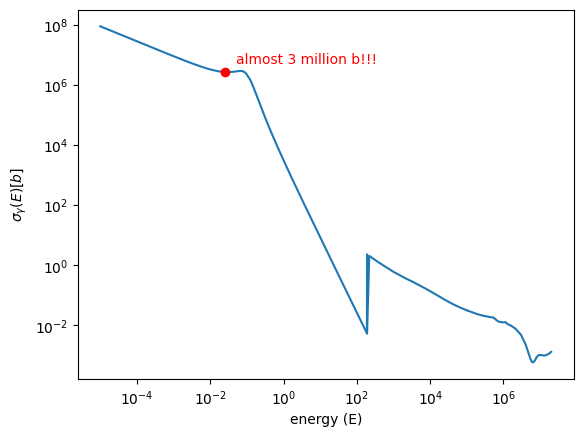

In [3]:
E, sig_Xe135 = np.loadtxt("Xe135g.txt", unpack=True, delimiter=",", skiprows=1)
plt.loglog(E, sig_Xe135)
plt.plot(0.0253, 2668930.0, 'ro')
plt.text(0.05,  5e6, "almost 3 million b!!!", color="r")
plt.xlabel('energy (E)')
plt.ylabel('$\sigma_{\gamma}(E) [b]$');

In [4]:
import sys
sys.path.append('unitcell')
from unitcell_utils import *

pwr = LWRUnitCell(fuel_radius=0.45, clad_radius=0.47, pitch=1.2, T_cool=600, T_fuel=1200)

In [5]:
pwr.run(np=100000)

/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=4.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=3.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=5.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=15.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=16.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=7.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [6]:
φ_Tf = pwr.flux['fuel'][1]
Σa_Tf = pwr.SigmaA['fuel'][1]
νΣf_Tf = pwr.nuSigmaF['fuel'][1]
Σf_Tf = pwr.SigmaF['fuel'][1]
φ_Tnf = pwr.flux['non-fuel'][1]
Σa_Tnf = pwr.SigmaA['non-fuel'][1]
V_f = pwr.volume['fuel']
V_nf = pwr.volume['non-fuel']

In [7]:
φ_Tf, φ_Tnf

(2.848381241302072, 3.1788173230128782)

In [8]:
V_f, V_nf

(0.6361725123519332, 0.8038274876480668)

In [9]:
νΣf_Tf, Σf_Tf

(0.4859479445694488, 0.1994287178174803)

In [10]:
Σa_Tf, Σa_Tnf

(0.26018920608336477, 0.0064263349853398745)

In [11]:
## p here
φ_Ff = pwr.flux['fuel'][0]
Σa_Ff = pwr.SigmaA['fuel'][0]
φ_Fnf = pwr.flux['non-fuel'][0]
Σa_Fnf = pwr.SigmaA['non-fuel'][0]

p = 1  - (V_f*Σa_Ff*φ_Ff)/ \
         (V_f*(Σa_Tf*φ_Tf+Σa_Ff*φ_Ff) + V_nf*(Σa_Tnf*φ_Tnf+Σa_Fnf*φ_Fnf))   
p

0.4944646474897614

In [12]:
## epsilon here
νΣf_Ff = pwr.nuSigmaF['fuel'][0]

ɛ = (νΣf_Ff*φ_Ff + νΣf_Tf*φ_Tf)/(νΣf_Tf*φ_Tf)
ɛ

1.452843542999055

In [13]:
λ_I135 = np.log(2)/(6.7*3600)
λ_Xe135 = np.log(2)/(9.2*3600)
γ_I135 = 0.0639
γ_Xe135 = 0.00237
σ_Xe135 = 2.6e6*1e-24 

In [14]:
phi = 3e13

N_Xe_oo = ((γ_I135 + γ_Xe135)*Σf_Tf*phi)/(λ_Xe135+σ_Xe135*phi)
N_Xe_oo

4007791560612354.5

In [15]:
Σa_fp = σ_Xe135*N_Xe_oo

In [16]:
k_with_Xe135 = νΣf_Tf*p*ɛ / (Σa_Tf + Σa_fp + (φ_Tnf/φ_Tf)*(V_nf/V_f)*Σa_Tnf)
k_with_Xe135

1.2482335717975532

In [17]:
k_without_Xe135 = νΣf_Tf*p*ɛ / (Σa_Tf + (φ_Tnf/φ_Tf)*(V_nf/V_f)*Σa_Tnf)
k_without_Xe135

1.296541326686542

In [18]:
Xe_worth = (k_with_Xe135-1)/k_with_Xe135 - (k_without_Xe135-1)/k_without_Xe135
Xe_worth

-0.029849332986784105